In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/winequality-red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


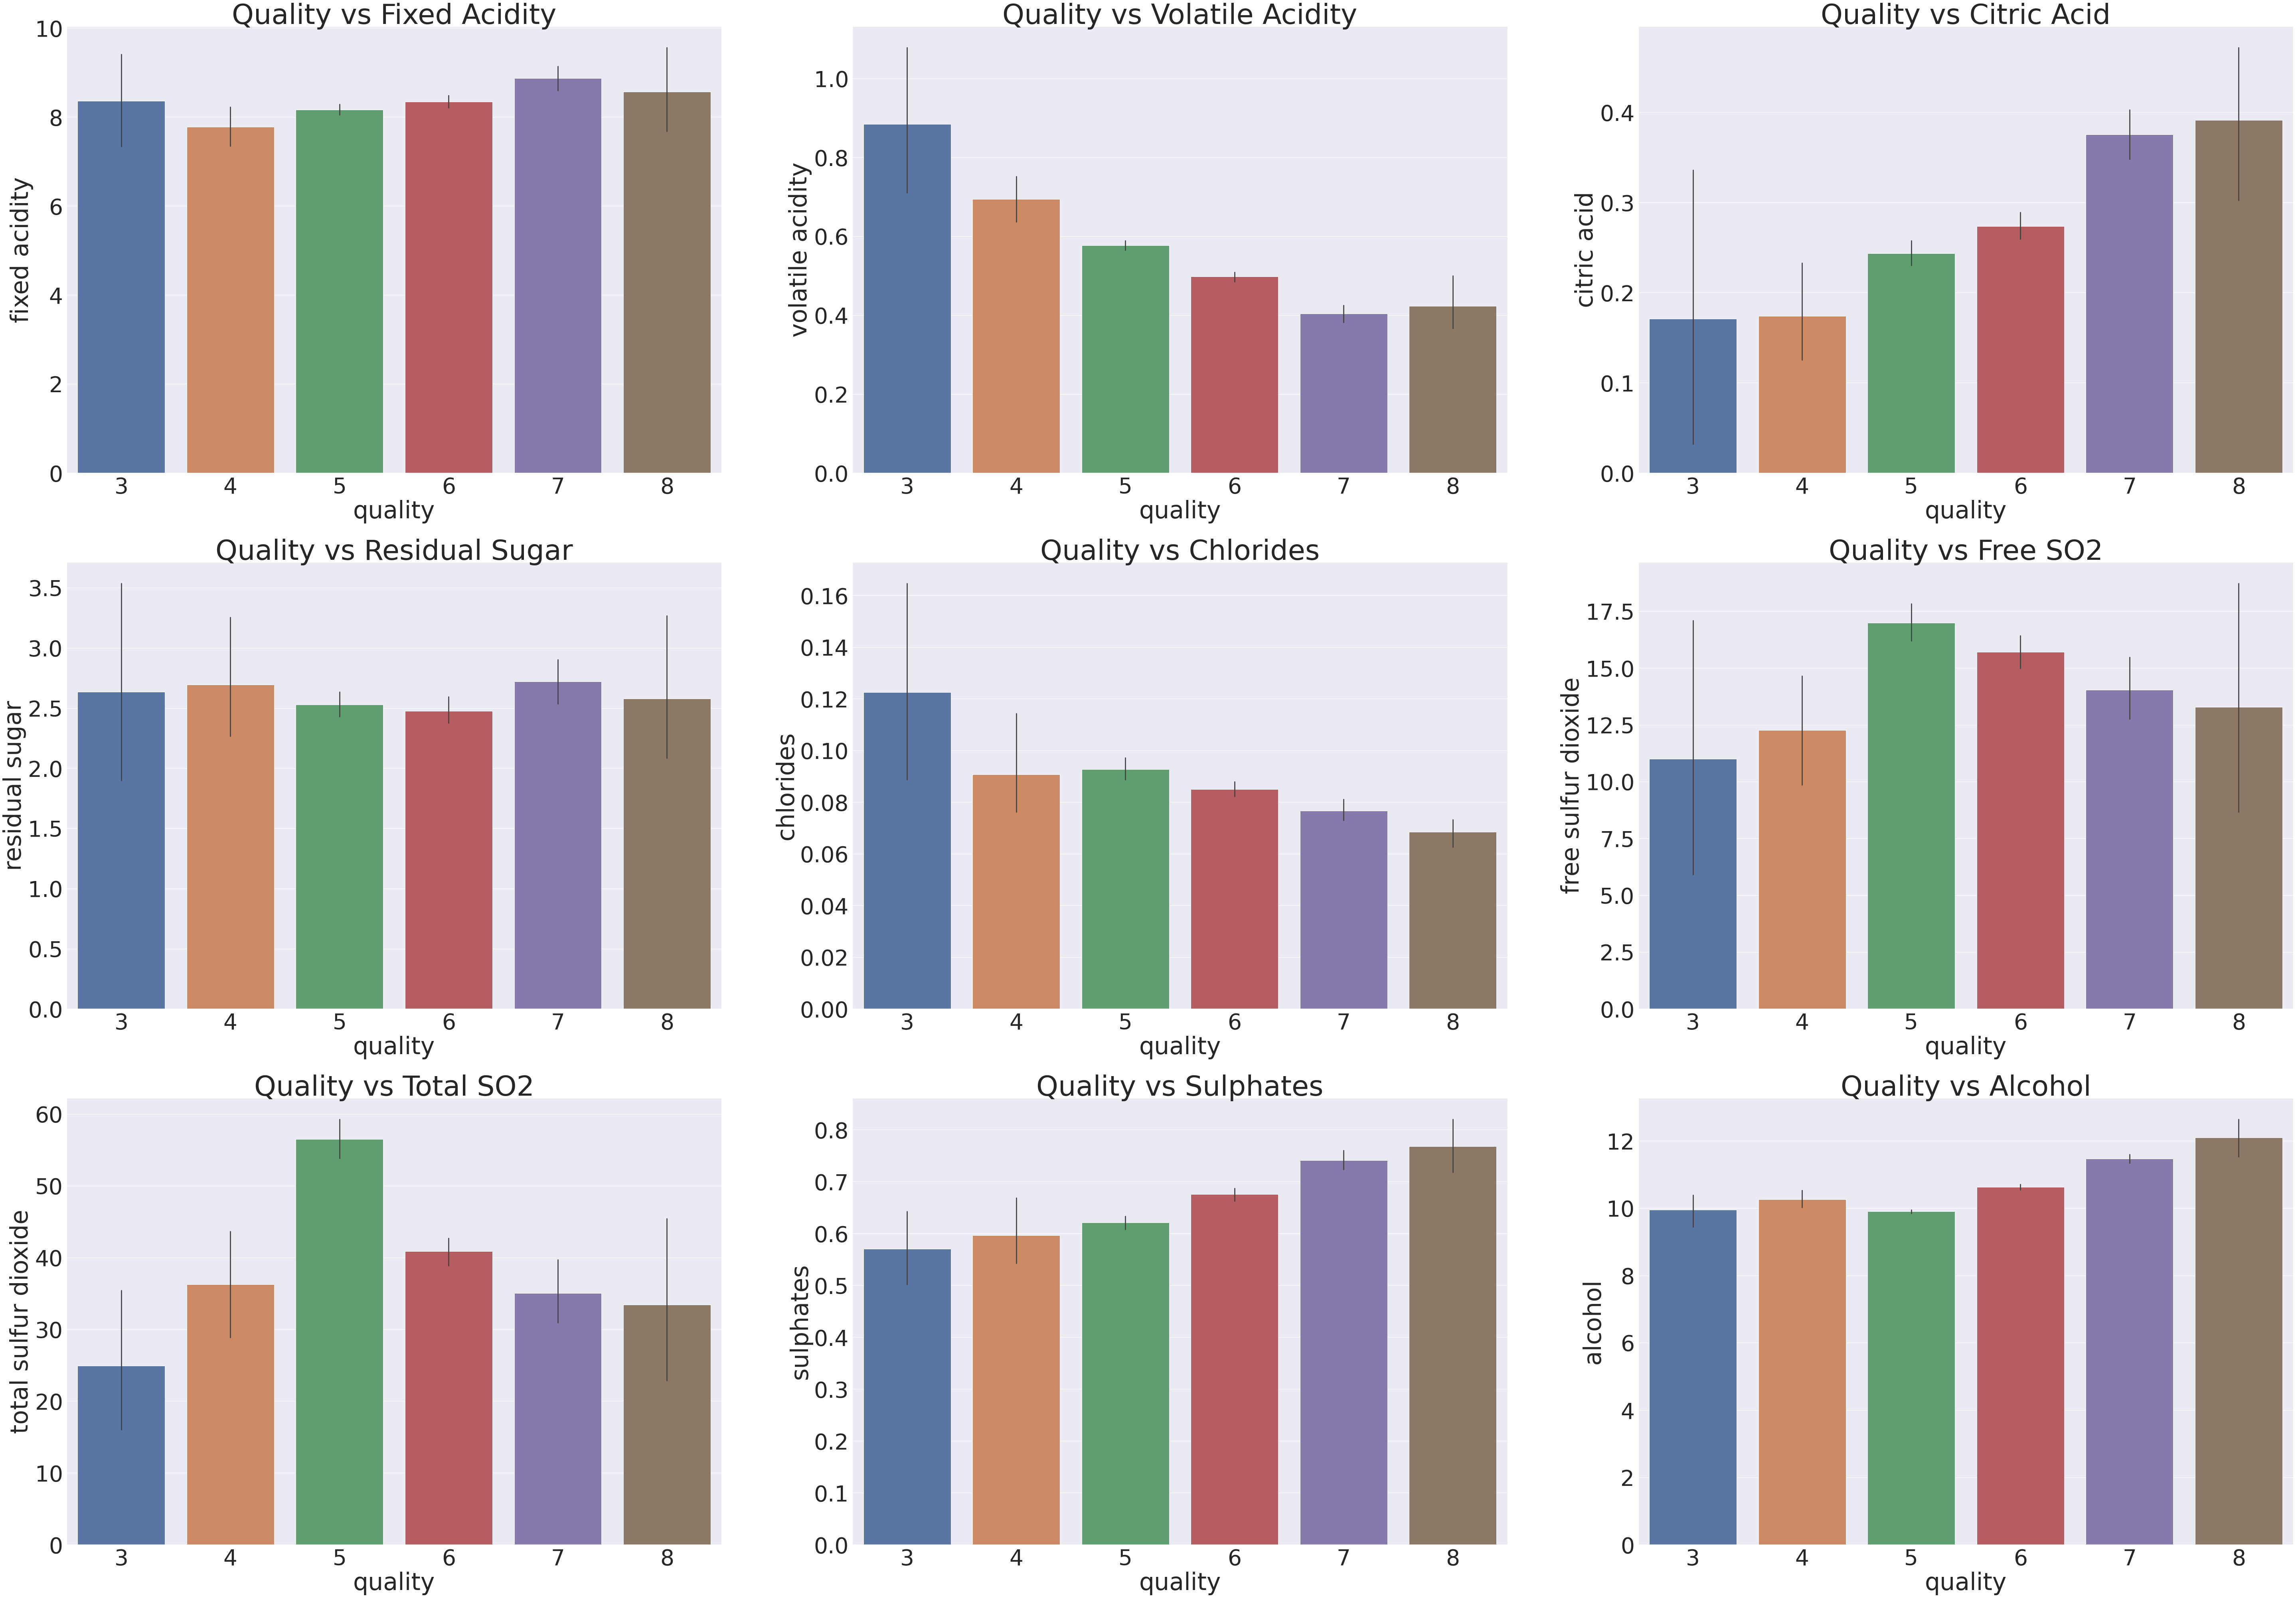

In [ ]:
 plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x='quality', y = 'fixed acidity',data=df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=70)
sns.barplot(x='quality', y = 'volatile acidity',data=df)

plt.subplot(333)
plt.title("Quality vs Citric Acid",fontsize=70)
sns.barplot(x='quality', y = 'citric acid',data=df)

plt.subplot(334)
plt.title("Quality vs Residual Sugar",fontsize=70)
sns.barplot(x='quality', y = 'residual sugar',data=df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=70)
sns.barplot(x='quality', y = 'chlorides',data=df)

plt.subplot(336)
plt.title("Quality vs Free SO2",fontsize=70)
sns.barplot(x='quality', y = 'free sulfur dioxide',data=df)

plt.subplot(337)
plt.title("Quality vs Total SO2",fontsize=70)
sns.barplot(x='quality', y = 'total sulfur dioxide',data=df)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=70)
sns.barplot(x='quality', y = 'sulphates',data=df)

plt.subplot(339)
plt.title("Quality vs Alcohol",fontsize=70)
sns.barplot(x='quality', y = 'alcohol',data=df)

In [ ]:
bins = (2,5.5,8)
classes = ['bad','good']
df['quality'] = pd.cut(df['quality'], bins = bins , labels = classes)


In [ ]:
label_quality = LabelEncoder()


In [ ]:
df['quality'] = label_quality.fit_transform(df['quality'])


In [ ]:
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

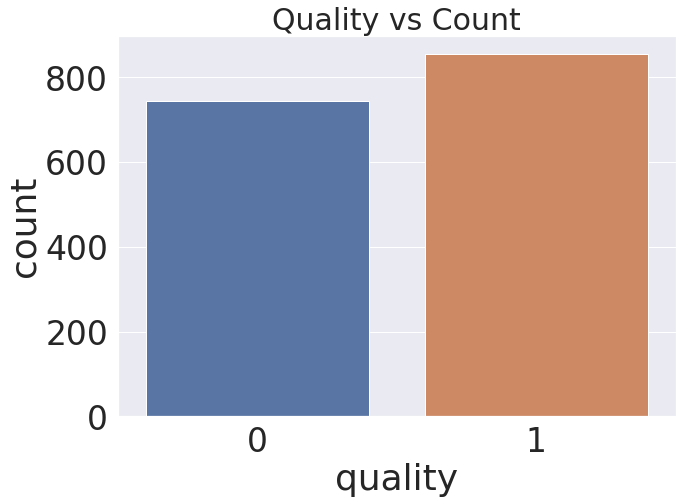

In [ ]:
plt.figure(figsize=(10,7))
sns.set(font_scale=3)
plt.title("Quality vs Count",fontsize=30)
sns.countplot(df['quality'])

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
X = df.drop('quality', axis = 1)
Y = df['quality'] 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 21)

In [ ]:
sc = StandardScaler()


In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
LR = LogisticRegression().fit(X_train,Y_train)

Logistic Regression Accuracy Score:  73.4375


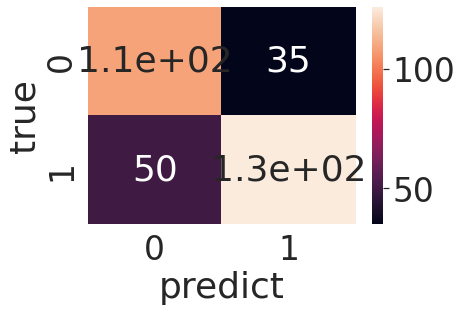

In [ ]:
pred_LR = LR.predict(X_test)
cm = confusion_matrix(Y_test,pred_LR)
ax = sns.heatmap(cm,annot=True)
ax.set(xlabel='predict',ylabel='true')
pred = accuracy_score(Y_test,pred_LR)
print("Logistic Regression Accuracy Score: ",pred*100)